Testingmycode

                                              tweets  text_length
0  Going to bat for the Cowboys has never felt mo...          139
1  Just dived into the grind today! When do you s...          112
2  Whoa, plot twist: That moment you think you fo...          132
3  If the world turns a blind eye to Palestine du...          131
4  Frustrated? Let it out! Don't let the noise dr...           91
Average Post Length: 132.0506329113924
Standard Deviatio Posts: 36.43008714777234


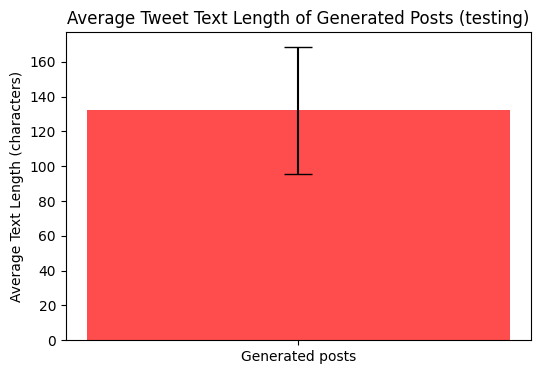

In [106]:
#FOR INTERMEDIATE STUFF JUST MY STUFF

import json
import pandas as pd
import matplotlib.pyplot as plt

data = r"session_22_result.json"
with open(data, 'r', encoding='utf-8') as f:
    data = json.load(f)

posts = data.get("tweets")
df_posts = pd.DataFrame({"tweets": posts})


df_posts['text_length'] = df_posts['tweets'].apply(len)


print(df_posts.head())

avg_length = df_posts['text_length'].mean()
std_length = df_posts['text_length'].std()


print("Average Post Length:", avg_length)
print("Standard Deviatio Posts:", std_length)


# Create a bar chart to compare the average lengths with error bars
import matplotlib.pyplot as plt

label = ['Generated posts']


plt.figure(figsize=(6,4))
plt.bar(label, avg_length, yerr=std_length, color='red', alpha=0.7, capsize=10)
plt.ylabel('Average Text Length (characters)')
plt.title('Average Tweet Text Length of Generated Posts (testing)')
plt.show()

sessionresults

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

#data = r"C:\Users\chloe\botstesting\final_dataset5.json"
data = r"session_22_results.json"
with open(data, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Check the keys in the dataset (should include 'posts', etc.)
print("Dataset keys:", list(data.keys()))

#76f947ab-c476-430d-9667-1bb8de6a9f10


Dataset keys: ['id', 'posts', 'users']


['965010ff-ee23-4a4d-8c2e-4737889b7659', '95659d4d-8bc1-4352-aafe-2b7cc01f8ec9', '22a0ac42-dc8e-4bf2-ba81-6858eacce6f1']
Total posts: 13478
Bot 1 posts: 74
Bot 2 posts: 52
Bot 3 posts: 48
Human posts: 12303


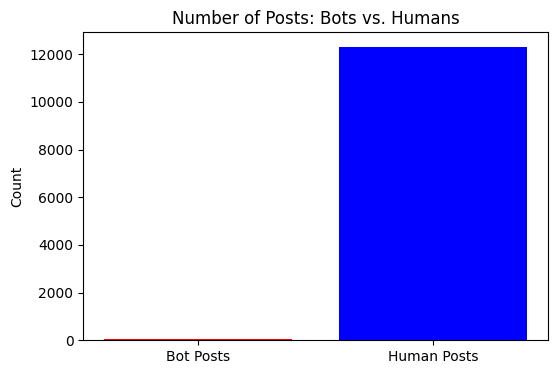

In [15]:
# Extract posts list from the dataset
posts = data.get("posts", [])

# Create a DataFrame for easier analysis
df_posts = pd.DataFrame(posts)

# Display the first few rows to verify structure
df_posts.head()

# Calculate total number of posts
total_posts = len(df_posts)

human_ids = []
bot_ids = []
bot1ids=[]
bot2ids=[]
bot3ids=[]
users = data.get("users", [])

for user in users:
    if user["is_bot"] == False:
        human_ids.append(user["user_id"])
    if user["bot_team_name"] == 'victoriabot1':
        bot1ids.append(user["user_id"])
    if user["bot_team_name"] == 'victoriabot2':
        bot2ids.append(user["user_id"])
    if user["bot_team_name"] == 'victoriabot3':
        bot3ids.append(user["user_id"])

print(bot3ids)

# Posts with an empty id are considered bot-generated
bot1_posts = df_posts[df_posts['author_id'].isin(bot1ids)]
bot2_posts = df_posts[df_posts['author_id'].isin(bot2ids)]
bot3_posts = df_posts[df_posts['author_id'].isin(bot3ids)]
human_posts = df_posts[df_posts['author_id'].isin(human_ids)]


print("Total posts:", total_posts)
print("Bot 1 posts:", len(bot1_posts))
print("Bot 2 posts:", len(bot2_posts))
print("Bot 3 posts:", len(bot3_posts))
print("Human posts:", len(human_posts))

# Create a simple bar chart to compare the counts
labels = ['Bot Posts', 'Human Posts']
counts = [len(bot3_posts), len(human_posts)]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['red', 'blue'])
plt.title("Number of Posts: Bots vs. Humans")
plt.ylabel("Count")
plt.show()

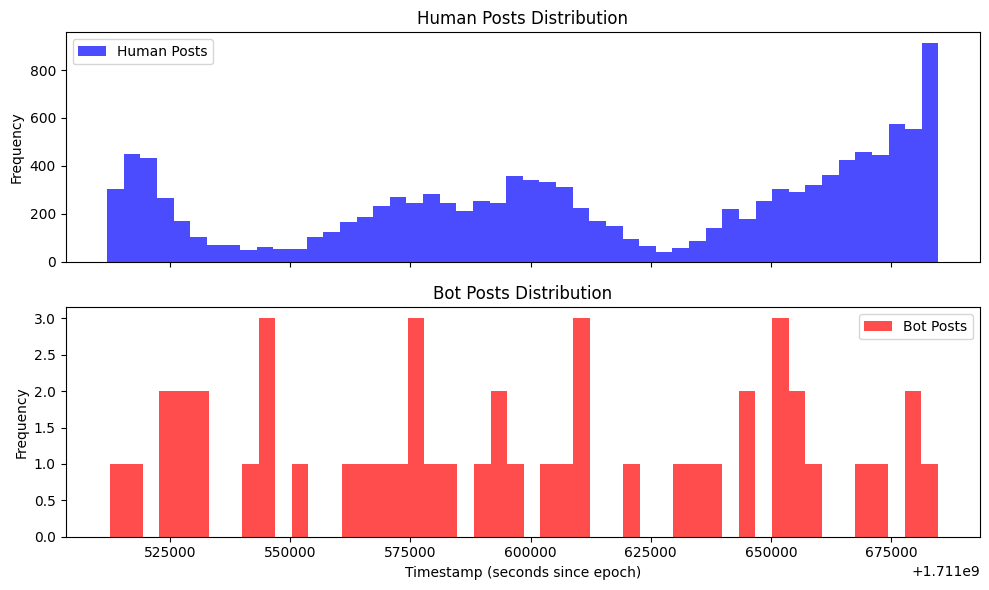

In [4]:
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime

# Convert ISO 8601 timestamps to Unix timestamps
def convert_to_unix(time_list):
    return [datetime.strptime(t, "%Y-%m-%dT%H:%M:%S.%fZ").timestamp() for t in time_list]

# Convert both bot and human times
bot_times_unix = convert_to_unix(bot3_posts["created_at"])
human_times_unix = convert_to_unix(human_posts["created_at"])

# Create two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)  # Two stacked graphs, shared x-axis

# Human Posts Histogram
axes[0].hist(human_times_unix, bins=50, alpha=0.7, color='blue', label='Human Posts')
axes[0].set_ylabel("Frequency")
axes[0].set_title("Human Posts Distribution")
axes[0].legend()

# Bot Posts Histogram
axes[1].hist(bot_times_unix, bins=50, alpha=0.7, color='red', label='Bot Posts')
axes[1].set_xlabel("Timestamp (seconds since epoch)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Bot Posts Distribution")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


Average Bot FT Post Length: 97.95945945945945
Standard Deviation Bot FT Posts: 28.673141071077225
Average Bot PE Post Length: 96.6875
Standard Deviation Bot PE Posts: 71.63683714521609
Average Human Post Length: 105.150776233439
Standard Deviation Human Posts: 71.4211142284967


/var/folders/m1/dx4rbxb15tbf7hxs4b996d2m0000gn/T/ipykernel_18867/3347482021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot1_posts['text_length'] = bot1_posts['text'].apply(len)
/var/folders/m1/dx4rbxb15tbf7hxs4b996d2m0000gn/T/ipykernel_18867/3347482021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot3_posts['text_length'] = bot3_posts['text'].apply(len)
/var/folders/m1/dx4rbxb15tbf7hxs4b996d2m0000gn/T/ipykernel_18867/3347482021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

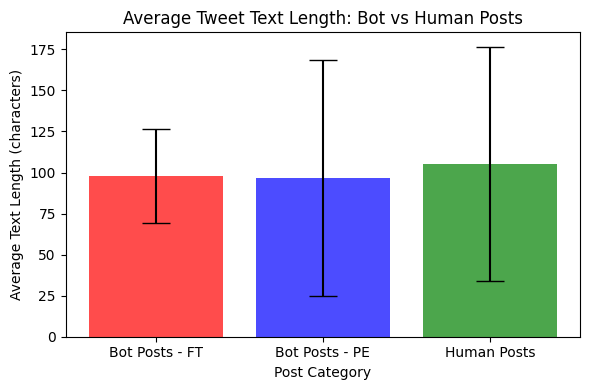

In [7]:
# Add text length to each group individually
bot1_posts['text_length'] = bot1_posts['text'].apply(len)
bot3_posts['text_length'] = bot3_posts['text'].apply(len)
human_posts['text_length'] = human_posts['text'].apply(len)

# Compute averages
avg_bot1_length = bot1_posts['text_length'].mean()
avg_bot3_length = bot3_posts['text_length'].mean()
avg_human_length = human_posts['text_length'].mean()

# Compute standard deviations
std_bot1_length = bot1_posts['text_length'].std()
std_bot3_length = bot3_posts['text_length'].std()
std_human_length = human_posts['text_length'].std()

# Print results
print("Average Bot FT Post Length:", avg_bot1_length)
print("Standard Deviation Bot FT Posts:", std_bot1_length)
print("Average Bot PE Post Length:", avg_bot3_length)
print("Standard Deviation Bot PE Posts:", std_bot3_length)
print("Average Human Post Length:", avg_human_length)
print("Standard Deviation Human Posts:", std_human_length)

# Plot
import matplotlib.pyplot as plt

labels = ['Bot Posts - FT', 'Bot Posts - PE', 'Human Posts']
avg_lengths = [avg_bot1_length, avg_bot3_length, avg_human_length]
std_devs = [std_bot1_length, std_bot3_length, std_human_length]

plt.figure(figsize=(6, 4))
plt.bar(labels, avg_lengths, yerr=std_devs, color=['red', 'blue', 'green'], alpha=0.7, capsize=10)
plt.xlabel('Post Category')
plt.ylabel('Average Text Length (characters)')
plt.title('Average Tweet Text Length: Bot vs Human Posts')
plt.tight_layout()
plt.show()


1316                 {}
1470                 {}
1559                 {}
1646                 {}
1750                 {}
1804       {wtf, bobhy}
1812                 {}
1913                 {}
1923                 {}
2002           {lakers}
2110                 {}
2137                 {}
2157         {isekaied}
2263           {portis}
2338                 {}
2383              {wtf}
2497           {lowkey}
2675    {isekaied, aot}
2986              {nck}
3040                 {}
Name: errors, dtype: object
0     {delvecchio, malkin, evgeni}
1                               {}
2                            {idk}
3                               {}
4                         {lakers}
5                               {}
6                          {hunny}
7      {moosehead, nico, hischier}
8                     {ivany, nhl}
9                               {}
10                              {}
11                              {}
12                          {dgaf}
13                     {kins, fav}
14

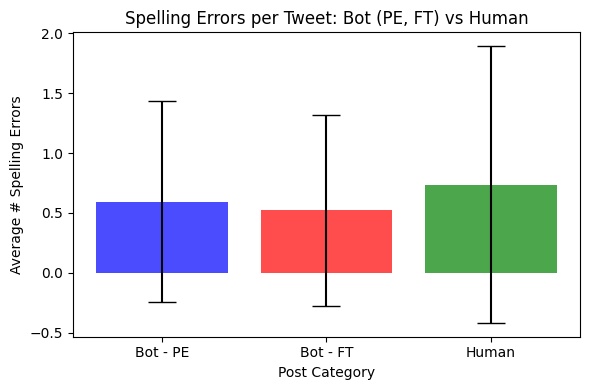

In [10]:
from spellchecker import SpellChecker
import matplotlib.pyplot as plt

spell = SpellChecker()

# Function to count typing errors
def count_typing_errors(text: str) -> int:
    """Counts misspelled words in a given text."""
    words = text.split()
    check = []
    for word in words:
        if not word.strip().isalpha():
            continue
        elif word.strip() == "https://t.co/twitter_link":
            continue
        else:
            check.append(word)
    misspelled = spell.unknown(check)
    return (len(misspelled), misspelled)

# Apply to full dataframe
df_posts['x'] = df_posts['text'].apply(count_typing_errors)
df_posts['numerrors'] = df_posts['x'].apply(lambda x: x[0])
df_posts['errors'] = df_posts['x'].apply(lambda x: x[1])

# Split groups
bot1_posts = df_posts[df_posts['author_id'].isin(bot1ids)]  # PE
bot3_posts = df_posts[df_posts['author_id'].isin(bot3ids)]  # FT
human_posts = df_posts[df_posts['author_id'].isin(human_ids)]

# Compute means
avg_bot1_errors = bot1_posts['numerrors'].mean()
avg_bot3_errors = bot3_posts['numerrors'].mean()
avg_human_errors = human_posts['numerrors'].mean()

# Compute standard deviations
std_bot1_errors = bot1_posts['numerrors'].std()
std_bot3_errors = bot3_posts['numerrors'].std()
std_human_errors = human_posts['numerrors'].std()

# Print examples
print(bot1_posts['errors'].head(20))
print(human_posts['errors'].head(20))

# Print stats
print("Average Bot PE Errors:", avg_bot1_errors)
print("Average Bot FT Errors:", avg_bot3_errors)
print("Average Human Errors:", avg_human_errors)

# Bar chart
labels = ['Bot - PE', 'Bot - FT', 'Human']
avg_errors = [avg_bot1_errors, avg_bot3_errors, avg_human_errors]
std_devs = [std_bot1_errors, std_bot3_errors, std_human_errors]

plt.figure(figsize=(6, 4))
plt.bar(labels, avg_errors, yerr=std_devs, color=['blue', 'red', 'green'], alpha=0.7, capsize=10)
plt.xlabel('Post Category')
plt.ylabel('Average # Spelling Errors')
plt.title('Spelling Errors per Tweet: Bot (PE, FT) vs Human')
plt.tight_layout()
plt.show()


Percentage of PE Bot Posts with Links: 40.54054054054054
Percentage of FT Bot Posts with Links: 66.66666666666666
Percentage of Human Posts with Links: 52.88141103795822
Percentage of PE Bot Posts with Mentions: 1.3513513513513513
Percentage of FT Bot Posts with Mentions: 8.333333333333332
Percentage of Human Posts with Mentions: 4.819962610745346


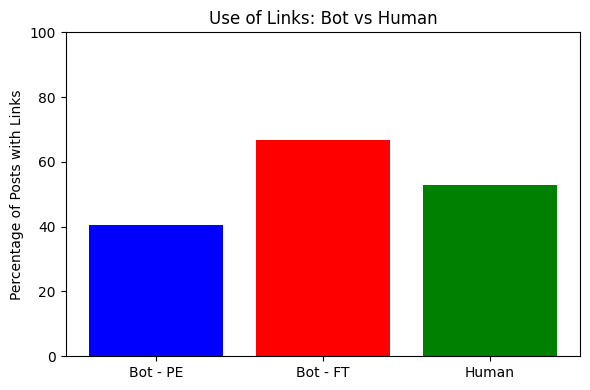

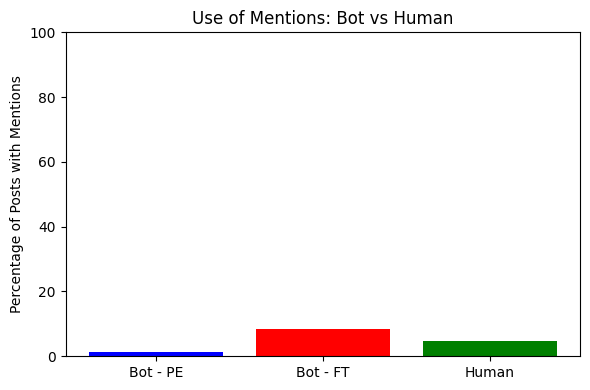

In [11]:
import matplotlib.pyplot as plt

# Count links
def count_links(text: str) -> int:
    return text.split().count("https://t.co/twitter_link")

# Count mentions
def count_mentions(text: str) -> int:
    return text.split().count("@mention")

# Apply to full dataframe
df_posts['numlinks'] = df_posts['text'].apply(count_links)
df_posts['nummentions'] = df_posts['text'].apply(count_mentions)

# Split groups
bot1_posts = df_posts[df_posts['author_id'].isin(bot1ids)]  # PE
bot3_posts = df_posts[df_posts['author_id'].isin(bot3ids)]  # FT
human_posts = df_posts[df_posts['author_id'].isin(human_ids)]

# Calculate link percentage per group
percent_links_bot1 = (bot1_posts['numlinks'] > 0).mean() * 100
percent_links_bot3 = (bot3_posts['numlinks'] > 0).mean() * 100
percent_links_human = (human_posts['numlinks'] > 0).mean() * 100

# Calculate mention percentage per group
percent_mentions_bot1 = (bot1_posts['nummentions'] > 0).mean() * 100
percent_mentions_bot3 = (bot3_posts['nummentions'] > 0).mean() * 100
percent_mentions_human = (human_posts['nummentions'] > 0).mean() * 100

# Print results
print("Percentage of PE Bot Posts with Links:", percent_links_bot1)
print("Percentage of FT Bot Posts with Links:", percent_links_bot3)
print("Percentage of Human Posts with Links:", percent_links_human)

print("Percentage of PE Bot Posts with Mentions:", percent_mentions_bot1)
print("Percentage of FT Bot Posts with Mentions:", percent_mentions_bot3)
print("Percentage of Human Posts with Mentions:", percent_mentions_human)

# --- Plot: Links ---
labels = ['Bot - PE', 'Bot - FT', 'Human']
percent_links = [percent_links_bot1, percent_links_bot3, percent_links_human]

plt.figure(figsize=(6, 4))
plt.ylim(0, 100)
plt.bar(labels, percent_links, color=['blue', 'red', 'green'], capsize=10)
plt.ylabel('Percentage of Posts with Links')
plt.title('Use of Links: Bot vs Human')
plt.tight_layout()
plt.show()

# --- Plot: Mentions ---
percent_mentions = [percent_mentions_bot1, percent_mentions_bot3, percent_mentions_human]

plt.figure(figsize=(6, 4))
plt.ylim(0, 100)
plt.bar(labels, percent_mentions, color=['blue', 'red', 'green'], capsize=10)
plt.ylabel('Percentage of Posts with Mentions')
plt.title('Use of Mentions: Bot vs Human')
plt.tight_layout()
plt.show()


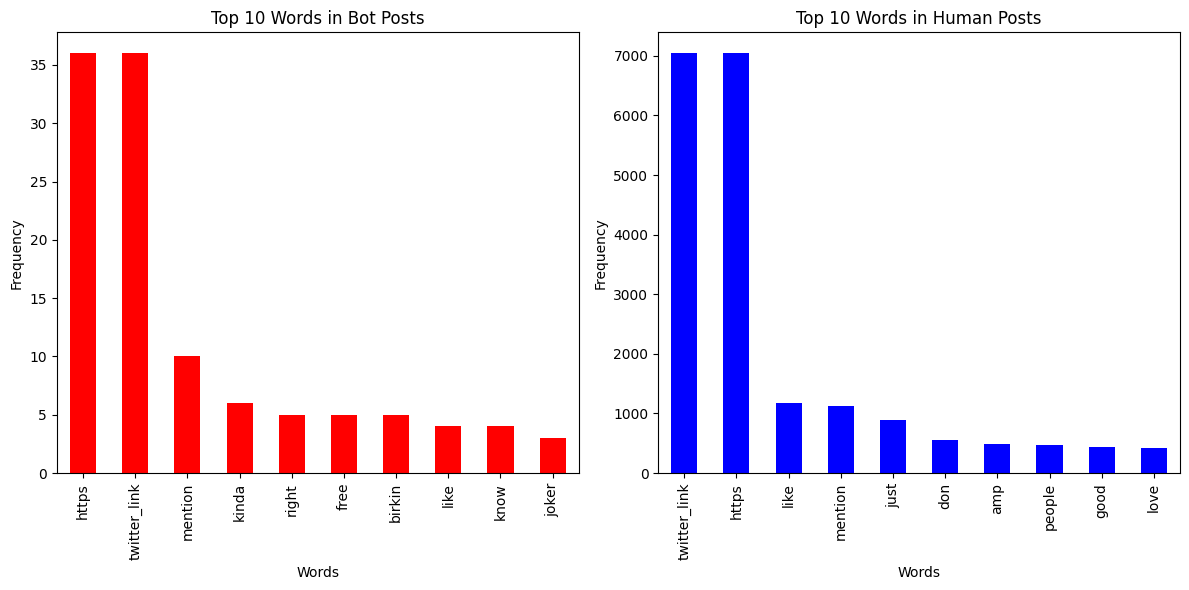

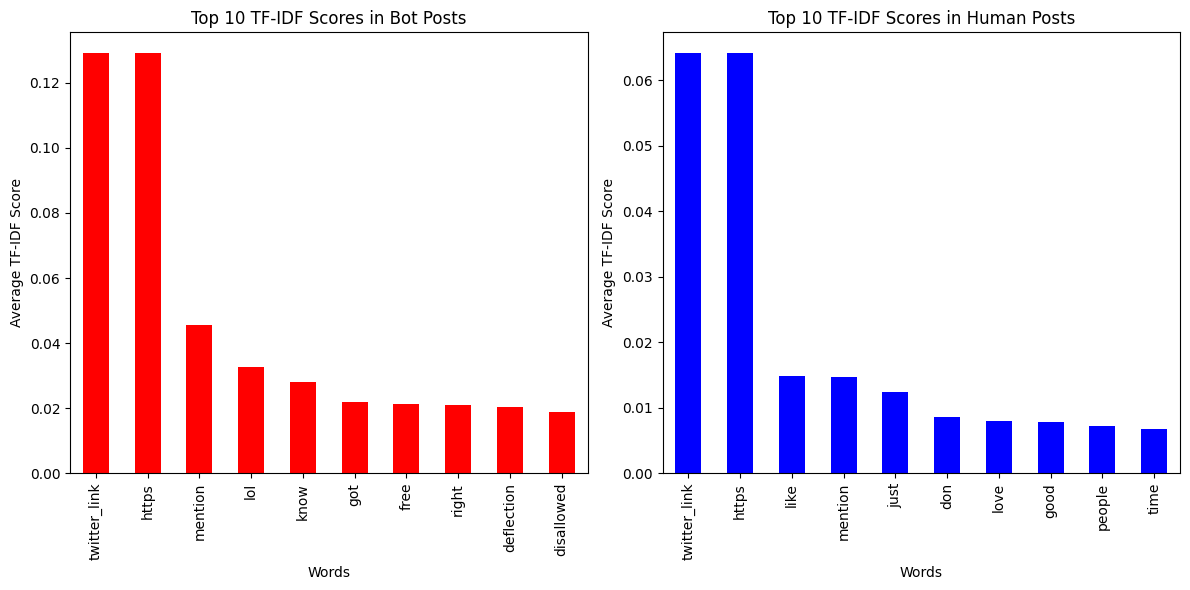

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Ensure you have lists of texts from bot and human posts
bot_texts = bot3_posts['text'].tolist()
human_texts = human_posts['text'].tolist()

# Number of top words to display
top_n = 10

# ---- Word Frequency Analysis ----

# For bot posts
vectorizer_bot = CountVectorizer(stop_words='english')
bot_counts = vectorizer_bot.fit_transform(bot_texts)
bot_word_freq = pd.DataFrame(bot_counts.toarray(), 
                             columns=vectorizer_bot.get_feature_names_out()).sum().sort_values(ascending=False)

# For human posts
vectorizer_human = CountVectorizer(stop_words='english')
human_counts = vectorizer_human.fit_transform(human_texts)
human_word_freq = pd.DataFrame(human_counts.toarray(), 
                               columns=vectorizer_human.get_feature_names_out()).sum().sort_values(ascending=False)

# Plotting top frequency words for bots and humans
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
bot_top_words = bot_word_freq.head(top_n)
bot_top_words.plot(kind='bar', color='red', title=f'Top {top_n} Words in Bot Posts')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
human_top_words = human_word_freq.head(top_n)
human_top_words.plot(kind='bar', color='blue', title=f'Top {top_n} Words in Human Posts')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ---- TF-IDF Analysis ----

# For bot posts
tfidf_vectorizer_bot = TfidfVectorizer(stop_words='english')
bot_tfidf = tfidf_vectorizer_bot.fit_transform(bot_texts)
bot_tfidf_scores = pd.DataFrame(bot_tfidf.toarray(), 
                                columns=tfidf_vectorizer_bot.get_feature_names_out())
bot_tfidf_avg = bot_tfidf_scores.mean().sort_values(ascending=False)

# For human posts
tfidf_vectorizer_human = TfidfVectorizer(stop_words='english')
human_tfidf = tfidf_vectorizer_human.fit_transform(human_texts)
human_tfidf_scores = pd.DataFrame(human_tfidf.toarray(), 
                                  columns=tfidf_vectorizer_human.get_feature_names_out())
human_tfidf_avg = human_tfidf_scores.mean().sort_values(ascending=False)

# Plotting top TF-IDF scores for bots and humans
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
bot_top_tfidf = bot_tfidf_avg.head(top_n)
bot_top_tfidf.plot(kind='bar', color='red', title=f'Top {top_n} TF-IDF Scores in Bot Posts')
plt.xlabel('Words')
plt.ylabel('Average TF-IDF Score')

plt.subplot(1,2,2)
human_top_tfidf = human_tfidf_avg.head(top_n)
human_top_tfidf.plot(kind='bar', color='blue', title=f'Top {top_n} TF-IDF Scores in Human Posts')
plt.xlabel('Words')
plt.ylabel('Average TF-IDF Score')

plt.tight_layout()
plt.show()

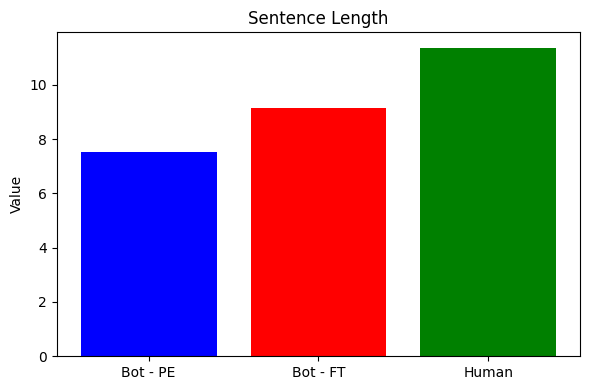

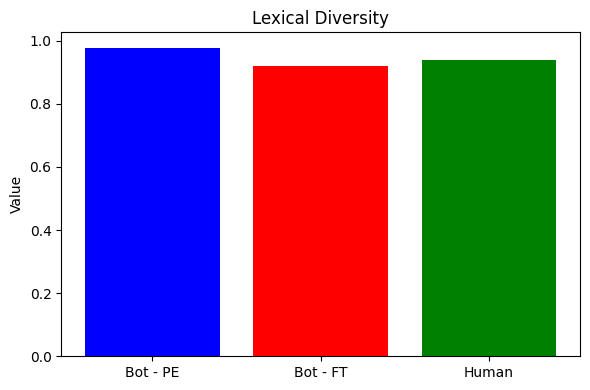

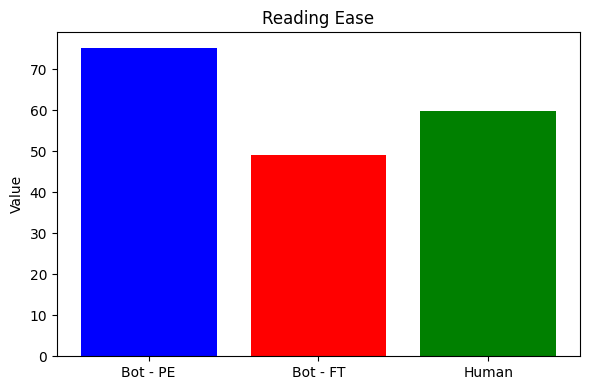

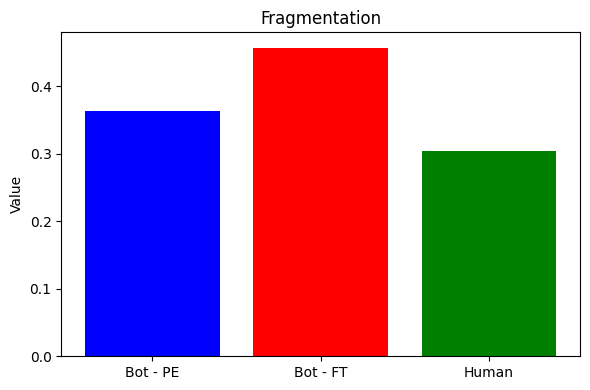

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import textstat

# Load spaCy model once
nlp = spacy.load("en_core_web_sm")

def spacy_sentence_tokenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

def spacy_word_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

def is_sentence_fragment(sentence):
    doc = nlp(sentence)
    has_subject = any(token.dep_ in ("nsubj", "nsubjpass", "expl") for token in doc)
    has_verb = any(token.pos_ in ("VERB", "AUX") for token in doc)
    return not (has_subject and has_verb)

def analyze_post_text(text):
    sentences = spacy_sentence_tokenize(text)
    words = spacy_word_tokenize(text)

    avg_sentence_length = len(words) / len(sentences) if sentences else 0
    lexical_diversity = len(set(words)) / len(words) if words else 0
    flesch_reading_ease = textstat.flesch_reading_ease(text)
    num_fragments = sum(is_sentence_fragment(sent) for sent in sentences)
    fragmentation = num_fragments / len(sentences) if sentences else 0

    return pd.Series({
        'avg_sentence_length': avg_sentence_length,
        'lexical_diversity': lexical_diversity,
        'flesch_reading_ease': flesch_reading_ease,
        'fragmentation': fragmentation
    })

# Apply analysis
metrics = df_posts['text'].apply(analyze_post_text)
df_posts = pd.concat([df_posts, metrics], axis=1)

# Group by author type
bot1_posts = df_posts[df_posts['author_id'].isin(bot1ids)]  # PE
bot3_posts = df_posts[df_posts['author_id'].isin(bot3ids)]  # FT
human_posts = df_posts[df_posts['author_id'].isin(human_ids)]

# Compute average metric values
def compute_metrics(df):
    return {
        "Sentence Length": df['avg_sentence_length'].mean(),
        "Lexical Diversity": df['lexical_diversity'].mean(),
        "Reading Ease": df['flesch_reading_ease'].mean(),
        "Fragmentation": df['fragmentation'].mean()
    }

metrics_bot1 = compute_metrics(bot1_posts)
metrics_bot3 = compute_metrics(bot3_posts)
metrics_human = compute_metrics(human_posts)

# Combine results for plotting
all_metrics = pd.DataFrame({
    "Bot - PE": metrics_bot1,
    "Bot - FT": metrics_bot3,
    "Human": metrics_human
})

# Plot each metric as a grouped bar chart
for metric in all_metrics.index:
    values = all_metrics.loc[metric]
    plt.figure(figsize=(6, 4))
    plt.bar(values.index, values.values, color=['blue', 'red', 'green'])
    plt.title(metric)
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()
